In [168]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt



In [169]:
data = pd.read_csv("KoreaTravel.csv")

In [170]:

data.head(10)

,ID,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
0,22020520011_1229732,4,1,1,100000.0,1,100000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,1,0
1,11090711981_1129310,3,1,1,250000.0,1,250000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
2,2503073057A_1070957,3,1,0,50001.0,3,16667.0,NaN,NaN,NaN,...,0,1,0,0,0,0,0,1,0,0
3,26030550451_1334180,3,1,1,120000.0,1,120000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,1
4,11080630451_1223531,2,1,2,350001.0,3,116667.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,1,0
5,11080651401_1284842,2,1,0,120000.0,4,30000.0,NaN,NaN,50000.0,...,0,0,1,0,0,0,0,0,0,1
6,11080770141_1000667,2,1,0,99999.0,3,33333.0,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0
7,11080810811_1059614,2,1,0,180000.0,3,60000.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
8,1108084201A_1000674,2,1,1,150000.0,1,150000.0,300000.0,NaN,NaN,...,0,1,0,0,0,0,1,0,0,0
9,1109064137A_1127756,2,1,0,85000.0,2,42500.0,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0


In [171]:
data['JEJU']=data['JEJU'].astype(int) #국내 각 지역 정보 정수형으로 변환
data['KYUNG_S']=data['KYUNG_S'].astype(int)
data['KYUNG_N']=data['KYUNG_N'].astype(int)
data['JEON_S']=data['JEON_S'].astype(int)
data['JEON_N']=data['JEON_N'].astype(int)
data['CHOONG_S']=data['CHOONG_S'].astype(int)
data['CHOONG_N']=data['CHOONG_N'].astype(int)
data['GANGWON']=data['GANGWON'].astype(int)
data['KYUNGGI']=data['KYUNGGI'].astype(int)
data['SEJONG']=data['SEJONG'].astype(int)
data['ULSAN']=data['ULSAN'].astype(int)
data['DAEJEON']=data['DAEJEON'].astype(int)
data['GWANGJU']=data['GWANGJU'].astype(int)
data['INCHEON']=data['INCHEON'].astype(int)
data['DAEGU']=data['DAEGU'].astype(int)
data['BUSAN']=data['BUSAN'].astype(int)
data['SEOUL']=data['SEOUL'].astype(int)


In [172]:
data=data.fillna(0) #결측치 처리

In [173]:
JEJU = pd.DataFrame() #지역별로 데이터 프레임 생성
KYUNG_S = pd.DataFrame()
KYUNG_N = pd.DataFrame()
JEON_S = pd.DataFrame()
JEON_N = pd.DataFrame()
CHOONG_S = pd.DataFrame()
CHOONG_N = pd.DataFrame()
GANGWON = pd.DataFrame()
KYUNGGI = pd.DataFrame()
SEJONG = pd.DataFrame()
ULSAN = pd.DataFrame()
DAEJEON = pd.DataFrame()
GWANGJU = pd.DataFrame()
INCHEON = pd.DataFrame()
DAEGU = pd.DataFrame()
BUSAN = pd.DataFrame()
SEOUL = pd.DataFrame()

In [174]:
JEJU = data.loc[data['JEJU']== 1]
KYUNG_S = data.loc[data['KYUNG_S']== 1]
KYUNG_N = data.loc[data['KYUNG_N']== 1]
JEON_S = data.loc[data['JEON_S']== 1]
JEON_N = data.loc[data['JEON_N']== 1]
CHOONG_S = data.loc[data['CHOONG_S']== 1]
CHOONG_N = data.loc[data['CHOONG_N']== 1]
GANGWON = data.loc[data['GANGWON']== 1]
KYUNGGI = data.loc[data['KYUNGGI']== 1]
SEJONG = data.loc[data['SEJONG']== 1]
ULSAN = data.loc[data['ULSAN']== 1]
DAEJEON = data.loc[data['DAEJEON']== 1]
GWANGJU = data.loc[data['GWANGJU']== 1]
INCHEON = data.loc[data['INCHEON']== 1]
DAEGU = data.loc[data['DAEGU']== 1]
BUSAN = data.loc[data['BUSAN']== 1]
SEOUL = data.loc[data['SEOUL']== 1]

In [175]:
# 만족도, 재방문률, 추천정도를 합쳐 관광객 선호도 점수를 만들어서 평가
seoul = SEOUL['Satify']+SEOUL['revisit']+SEOUL['recommend']
busan = BUSAN['Satify']+BUSAN['revisit']+BUSAN['recommend']
daegu = DAEGU['Satify']+DAEGU['revisit']+DAEGU['recommend']
incheon = INCHEON['Satify']+INCHEON['revisit']+INCHEON['recommend']
gwangju = GWANGJU['Satify']+GWANGJU['revisit']+GWANGJU['recommend']
daejeon = DAEJEON['Satify']+DAEJEON['revisit']+DAEJEON['recommend']
ulsan = ULSAN['Satify']+ULSAN['revisit']+ULSAN['recommend']
sejong = SEJONG['Satify']+SEJONG['revisit']+SEJONG['recommend']
kyunggi = KYUNGGI['Satify']+KYUNGGI['revisit']+KYUNGGI['recommend']
gangwon = GANGWON['Satify']+GANGWON['revisit']+GANGWON['recommend']
choong_n = CHOONG_N['Satify']+CHOONG_N['revisit']+CHOONG_N['recommend']
choong_s = CHOONG_S['Satify']+CHOONG_S['revisit']+CHOONG_S['recommend']
jeon_n = JEON_N['Satify']+JEON_N['revisit']+JEON_N['recommend']
jeon_s = JEON_S['Satify']+JEON_S['revisit']+JEON_S['recommend']
kyung_n = KYUNG_N['Satify']+KYUNG_N['revisit']+KYUNG_N['recommend']
kyung_s = KYUNG_S['Satify']+KYUNG_S['revisit']+KYUNG_S['recommend']
jeju = JEJU['Satify']+JEJU['revisit']+JEJU['recommend']


c:\Users\ros43\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ros43\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ros43\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

[Text(0.5, 1.0, '제주')]

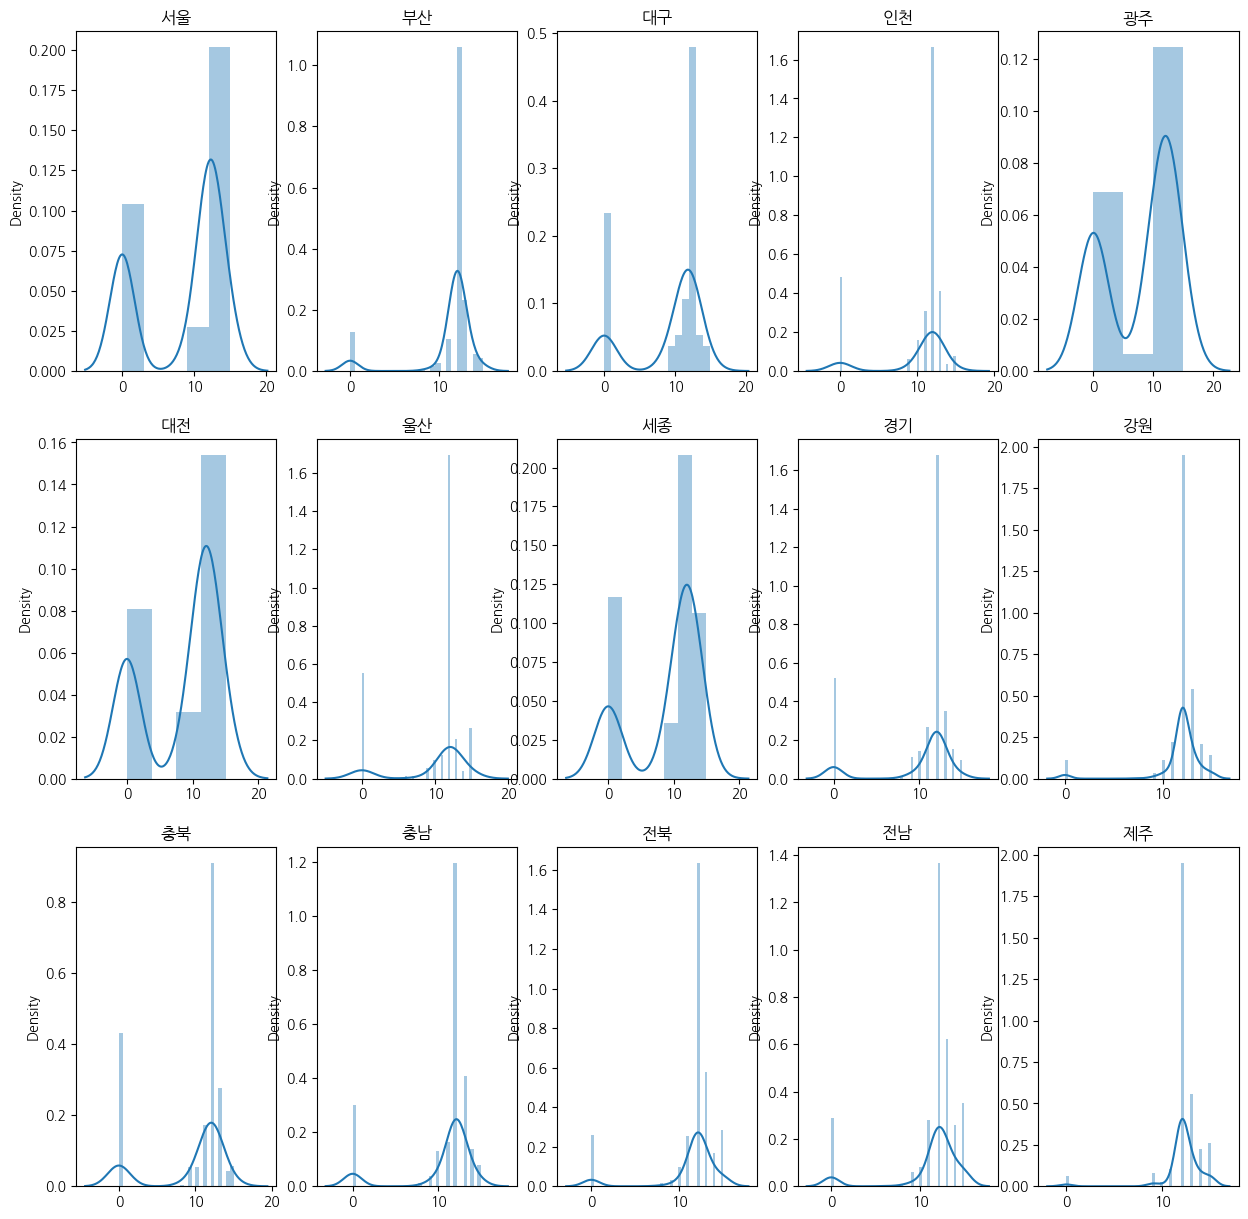

In [176]:
fig, ax = plt.subplots(ncols=5, nrows=3,figsize=(15,15))
sns.distplot(seoul,ax=ax[0,0]).set(title='서울')
sns.distplot(busan,ax=ax[0,1]).set(title='부산')
sns.distplot(daegu,ax=ax[0,2]).set(title='대구')
sns.distplot(incheon,ax=ax[0,3]).set(title='인천')
sns.distplot(gwangju,ax=ax[0,4]).set(title='광주')
sns.distplot(daejeon,ax=ax[1,0]).set(title='대전')
sns.distplot(ulsan,ax=ax[1,1]).set(title='울산')
sns.distplot(sejong,ax=ax[1,2]).set(title='세종')
sns.distplot(kyunggi,ax=ax[1,3]).set(title='경기')
sns.distplot(gangwon,ax=ax[1,4]).set(title='강원')
sns.distplot(choong_n,ax=ax[2,0]).set(title='충북')
sns.distplot(choong_s,ax=ax[2,1]).set(title='충남')
sns.distplot(jeon_n,ax=ax[2,2]).set(title='전북')
sns.distplot(jeon_s,ax=ax[2,3]).set(title='전남')
sns.distplot(jeju,ax=ax[2,4]).set(title='제주')


{'whiskers': [<matplotlib.lines.Line2D at 0x1f5193c9790>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5193c9d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5193c9490>,
 'medians': [<matplotlib.lines.Line2D at 0x1f5193c1310>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f5193c15e0>,
 'means': []}

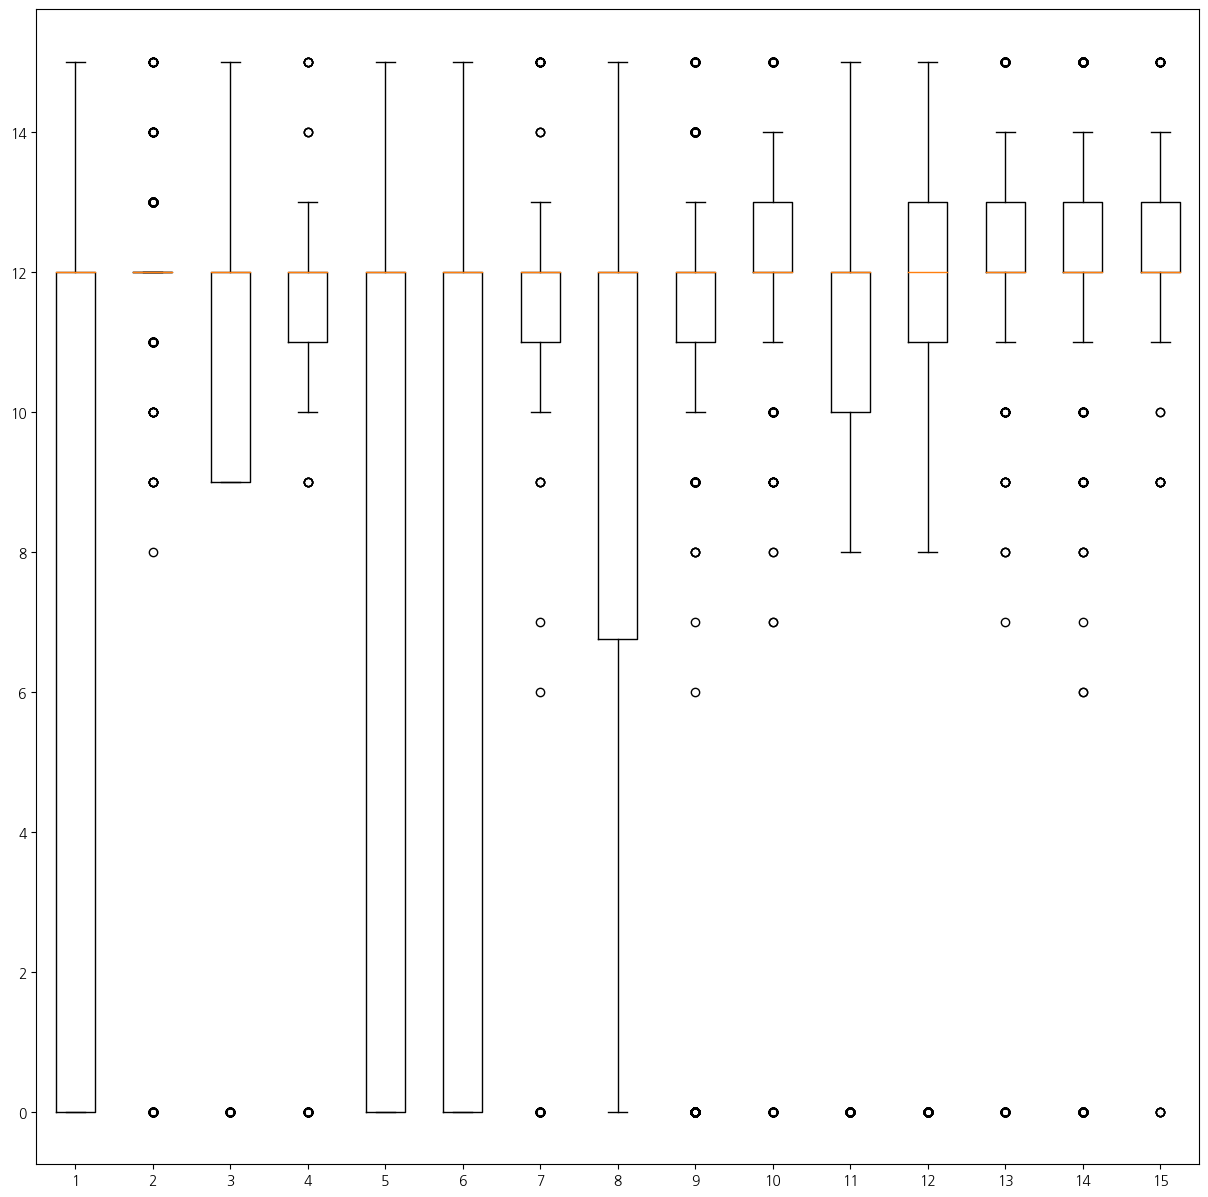

In [177]:
fig, ax = plt.subplots(figsize=(15,15))
ax.boxplot([seoul,busan,daegu,incheon,gwangju,daejeon,ulsan,sejong,kyunggi,gangwon,choong_n,choong_s,jeon_n,jeon_s,jeju])

((array([-2.80597209, -2.50700419, -2.33750901, -2.21661313, -2.12142152,
         -2.04228618, -1.97419162, -1.91418309, -1.86036734, -1.81145546,
         -1.76652874, -1.72490835, -1.68607789, -1.64963504, -1.61525996,
         -1.58269404, -1.55172506, -1.52217663, -1.49390047, -1.4667707 ,
         -1.4406795 , -1.41553377, -1.39125254, -1.36776493, -1.34500855,
         -1.32292813, -1.3014745 , -1.28060372, -1.26027632, -1.24045674,
         -1.2211128 , -1.20221531, -1.18373766, -1.16565557, -1.14794677,
         -1.13059084, -1.11356896, -1.09686375, -1.08045916, -1.0643403 ,
         -1.04849332, -1.03290538, -1.01756445, -1.00245934, -0.98757956,
         -0.97291528, -0.9584573 , -0.94419694, -0.93012604, -0.91623694,
         -0.90252238, -0.8889755 , -0.87558984, -0.86235925, -0.84927792,
         -0.83634033, -0.82354123, -0.81087565, -0.79833883, -0.78592625,
         -0.77363359, -0.76145674, -0.74939176, -0.73743489, -0.72558254,
         -0.71383125, -0.70217771, -0.

c:\Users\ros43\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


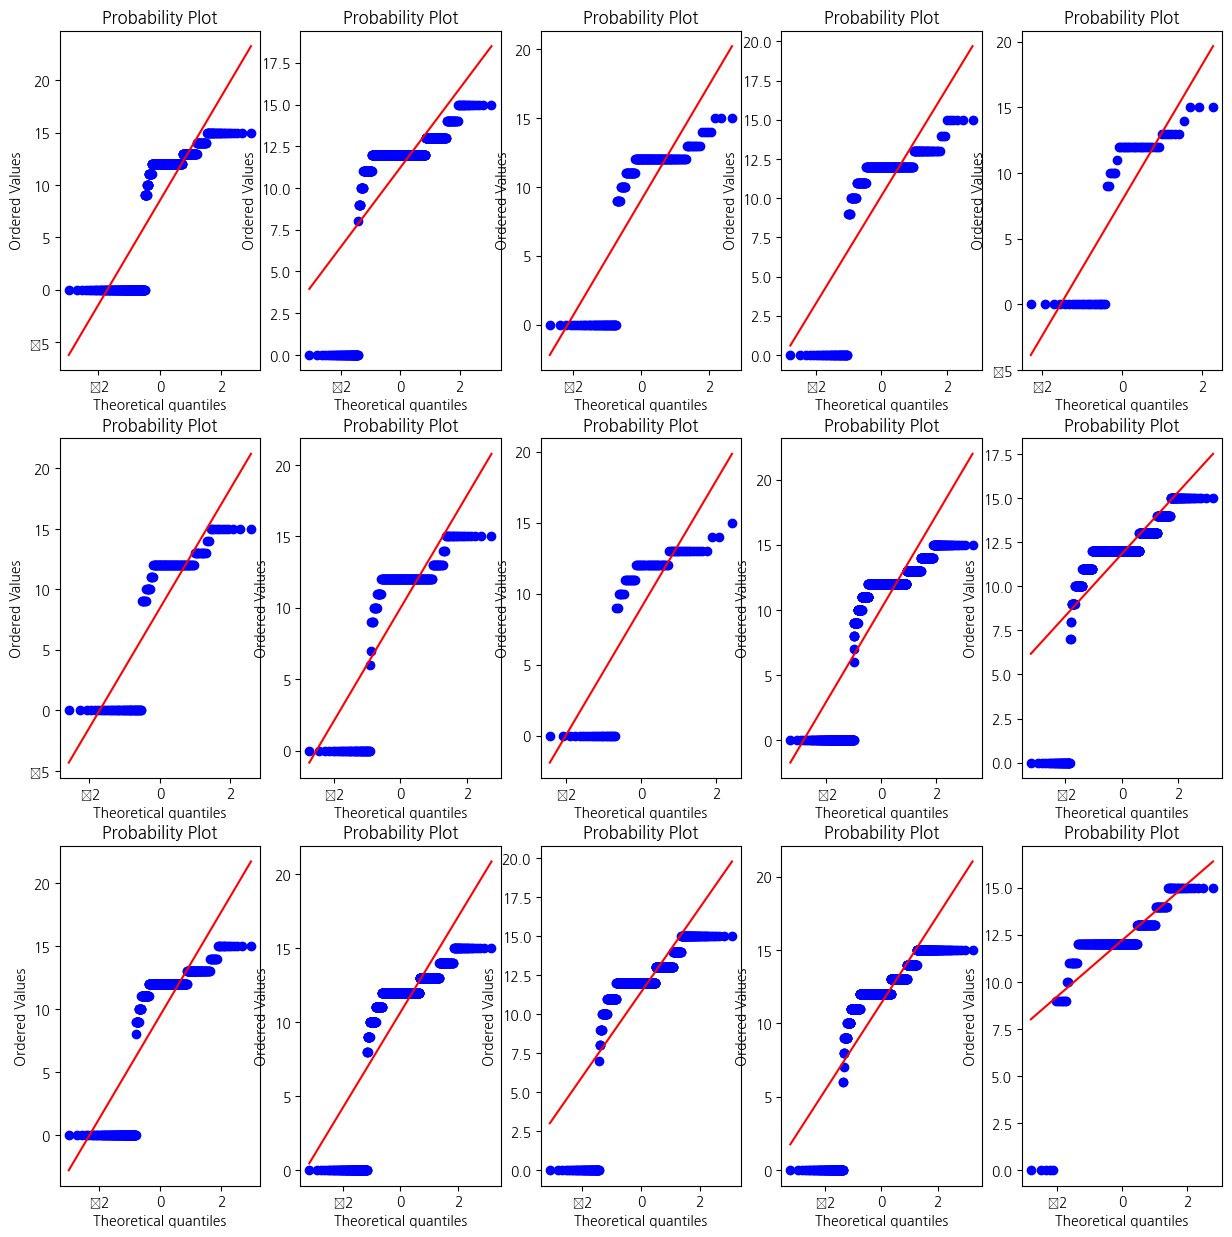

In [178]:
fig, axes = plt.subplots(ncols=5, nrows=3,figsize=(15,15))
stats.probplot(seoul,plot=axes[0,0],dist=stats.norm)
stats.probplot(busan,plot=axes[0,1],dist=stats.norm)
stats.probplot(daegu,plot=axes[0,2],dist=stats.norm)
stats.probplot(incheon,plot=axes[0,3],dist=stats.norm)
stats.probplot(gwangju,plot=axes[0,4],dist=stats.norm)
stats.probplot(daejeon,plot=axes[1,0],dist=stats.norm)
stats.probplot(ulsan,plot=axes[1,1],dist=stats.norm)
stats.probplot(sejong,plot=axes[1,2],dist=stats.norm)
stats.probplot(kyunggi,plot=axes[1,3],dist=stats.norm)
stats.probplot(gangwon,plot=axes[1,4],dist=stats.norm)
stats.probplot(choong_n,plot=axes[2,0],dist=stats.norm)
stats.probplot(choong_s,plot=axes[2,1],dist=stats.norm)
stats.probplot(jeon_n,plot=axes[2,2],dist=stats.norm)
stats.probplot(jeon_s,plot=axes[2,3],dist=stats.norm)
stats.probplot(jeju,plot=axes[2,4],dist=stats.norm)
